In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_log_error


In [2]:
# Upload data
df = pd.read_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Convert gender to binary
df["Sex binary"] = df["Sex"].replace(["male","female"],[1,0])
df["Sex binary"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex binary, Length: 891, dtype: int64

In [6]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# Check data for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex binary       0
dtype: int64

In [8]:
# Find median age
age_median = df["Age"].median()

In [9]:
# Fill missing age with median
df["Age"] = df["Age"].fillna(age_median)

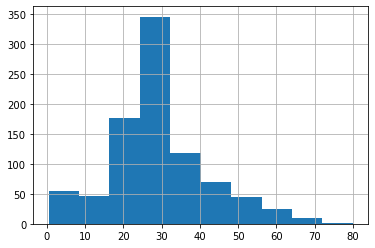

In [10]:
df["Age"].hist()
plt.show()

In [11]:
# Create bins for age
df["AgeGroup"] = pd.cut(df["Age"], bins = [0,20,40,60,80])

In [12]:
df["AgeGroup"].isnull().sum()

0

In [13]:
# Label age bins
df["AgeGroupEnc"] = LabelEncoder().fit_transform(df["AgeGroup"])

In [14]:
df["AgeGroupEnc"].value_counts()

1    562
0    179
2    128
3     22
Name: AgeGroupEnc, dtype: int64

In [15]:
# Create new feature combine gender and ticket class
df["Pclass_str"] = df["Pclass"].apply(lambda x: str(x))
df["Sex_Class"] = df.loc[:,['Sex',"Pclass_str"]].apply(lambda x: "".join(x),axis=1)
df["Sex_Class"].value_counts()

male3      347
female3    144
male1      122
male2      108
female1     94
female2     76
Name: Sex_Class, dtype: int64

In [16]:
pd.get_dummies(df["Sex_Class"])

,female1,female2,female3,male1,male2,male3
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,1,0,0,0,0,0
888,0,0,1,0,0,0
889,0,0,0,1,0,0


In [17]:
# Fill missing fare with median
fare_mean = df["Fare"].mean()
df["Fare"] = df["Fare"].fillna(fare_mean)

In [18]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex binary       0
AgeGroup         0
AgeGroupEnc      0
Pclass_str       0
Sex_Class        0
dtype: int64

In [20]:
objects = ["male","female"]
performance_survived = [df[(df["Sex"]=="male")&(df["Survived"]==1)]["Sex"].count(),df[(df["Sex"]=="female")&(df["Survived"]==1)]["Sex"].count()]

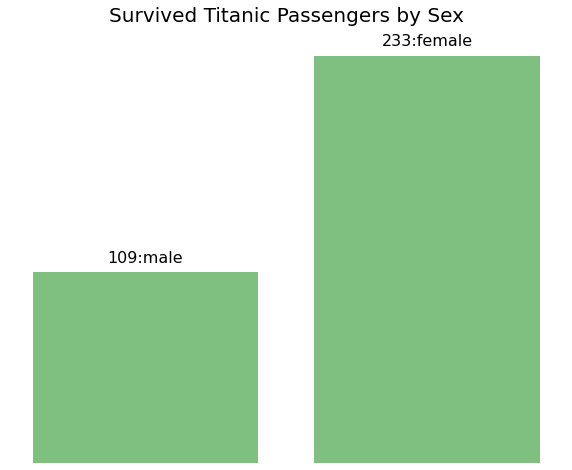

In [21]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(objects)),performance_survived,alpha=0.5, color="green")
plt.xticks(np.arange(len(objects)), objects)
plt.ylabel('Survived')
plt.title('Survived Titanic Passengers by Sex',fontsize=20)
plt.axis("off")
plt.yticks(range(0,250))
for x,y,i in zip(np.arange(len(objects)),performance_survived,objects):
        
    label = "{:.0f}:{}".format(y,i)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 fontsize = 16,
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [22]:
objects = ["male","female"]
performance_died = [df[(df["Sex"]=="male")&(df["Survived"]==0)]["Sex"].count(),df[(df["Sex"]=="female")&(df["Survived"]==0)]["Sex"].count()]

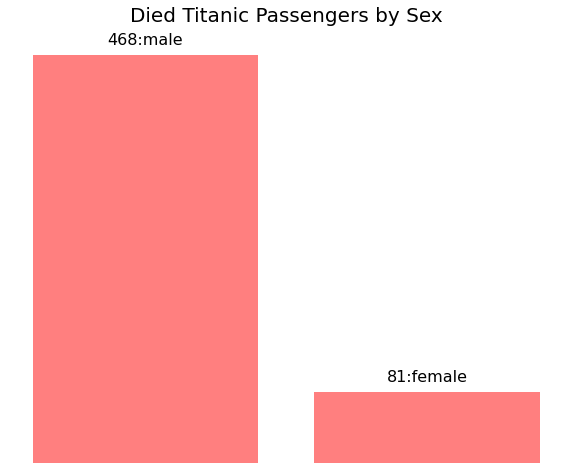

In [23]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(objects)),performance_died,alpha=0.5, color="red")
plt.xticks(np.arange(len(objects)), objects)
plt.ylabel('Survived')
plt.title('Died Titanic Passengers by Sex',fontsize=20)
plt.axis("off")
plt.yticks(range(0,500))
for x,y,i in zip(np.arange(len(objects)),performance_died,objects):
        
    label = "{:.0f}:{}".format(y,i)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 fontsize = 16,
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [24]:
pd.set_option('display.max_rows', 500)
# Data after wrangling
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex binary,AgeGroup,AgeGroupEnc,Pclass_str,Sex_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(20, 40]",1,3,male3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(20, 40]",1,1,female1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(20, 40]",1,3,female3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(20, 40]",1,1,female1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(20, 40]",1,3,male3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,"(20, 40]",1,2,male2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,"(0, 20]",0,1,female1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,"(20, 40]",1,3,female3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(20, 40]",1,1,male1


In [25]:
# Separate data for modeling
x = pd.concat([pd.get_dummies(df.loc[:,["Embarked","Sex_Class"]]),df.loc[:,["Fare","AgeGroupEnc","Parch","SibSp","Sex binary"]]],axis=1)
y = df["Survived"]

In [26]:
x

,Embarked_C,Embarked_Q,Embarked_S,Sex_Class_female1,Sex_Class_female2,Sex_Class_female3,Sex_Class_male1,Sex_Class_male2,Sex_Class_male3,Fare,AgeGroupEnc,Parch,SibSp,Sex binary
0,0,0,1,0,0,0,0,0,1,7.2500,1,0,1,1
1,1,0,0,1,0,0,0,0,0,71.2833,1,0,1,0
2,0,0,1,0,0,1,0,0,0,7.9250,1,0,0,0
3,0,0,1,1,0,0,0,0,0,53.1000,1,0,1,0
4,0,0,1,0,0,0,0,0,1,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,1,0,13.0000,1,0,0,1
887,0,0,1,1,0,0,0,0,0,30.0000,0,0,0,0
888,0,0,1,0,0,1,0,0,0,23.4500,1,2,1,0
889,1,0,0,0,0,0,1,0,0,30.0000,1,0,0,1


In [27]:
# Split data for train,test
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)

In [28]:
# grid of parameters 1
gridParams = {
   'learning_rate': [0.04],
   'num_leaves': [85,90,95,100],
   'boosting_type' : ['gbdt'],
   'objective' : ['binary'],
   'max_depth' : [1,2,3,4,5],
   'random_state' : [501], 
   'colsample_bytree' : [0.6,0.7,0.8,0.9],
   'subsample' : [0.5,0.7],
   'min_split_gain' : [0.01],
   'min_data_in_leaf':[10],
   'metric':['accuracy']
   }

clf = lgb.LGBMRegressor()
grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
grid.fit(x_train,y_train)

grid.best_params_

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    3.3s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    7.6s finished


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.04,
 'max_depth': 5,
 'metric': 'accuracy',
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 85,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.5}

In [29]:
y_pred = grid.predict(x_test)

In [30]:
# Check best threshold
threshold_value = []
accuracy_value = []
y_pred2 = []
for i in np.linspace(0,1,100):
    
    threshold = i
    for z in range(x_test.shape[0]):
        if y_pred[z] >= threshold:       
            y_pred2.append(1)
        else:  
            y_pred2.append(0)
        
    threshold_value.append(i)
   
    accuracy_value.append(accuracy_score(y_pred2,y_test))
    y_pred2 = []
df_threshold = pd.DataFrame(list(zip(threshold_value,accuracy_value)), columns=["threshold","accuracy"])

df_threshold[df_threshold["accuracy"] ==  df_threshold["accuracy"].max()]

,threshold,accuracy
50,0.505051,0.834081
55,0.555556,0.834081


In [31]:
# setting prob to number
y_pred2 = []
threshold = 0.505051
for i in range(x_test.shape[0]):
    if y_pred[i] >= threshold:       
       y_pred2.append(1)
    else:  
       y_pred2.append(0)

In [32]:
# Evaluation metricks
print('AUC of LGB classifier on test set:{:.3f}\n'.format(roc_auc_score(y_test,y_pred2)))
print('Accuracy of LGB  classifier on test set: {:.3f}\n'.format(accuracy_score(y_test,y_pred2)))
print('Precision of LGB  classifier on test set: {:.3f}\n'.format(precision_score(y_test,y_pred2)))
print('Recall of LGB  classifier on test set: {:.3f}\n'.format(recall_score(y_test,y_pred2)))
print('F1_score of LGB  classifier on test set: {:.3f}\n'.format(f1_score(y_test,y_pred2)))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred2))

AUC of LGB classifier on test set:0.808

Accuracy of LGB  classifier on test set: 0.834

Precision of LGB  classifier on test set: 0.831

Recall of LGB  classifier on test set: 0.702

F1_score of LGB  classifier on test set: 0.761

Confusion matrix
 [[127  12]
 [ 25  59]]


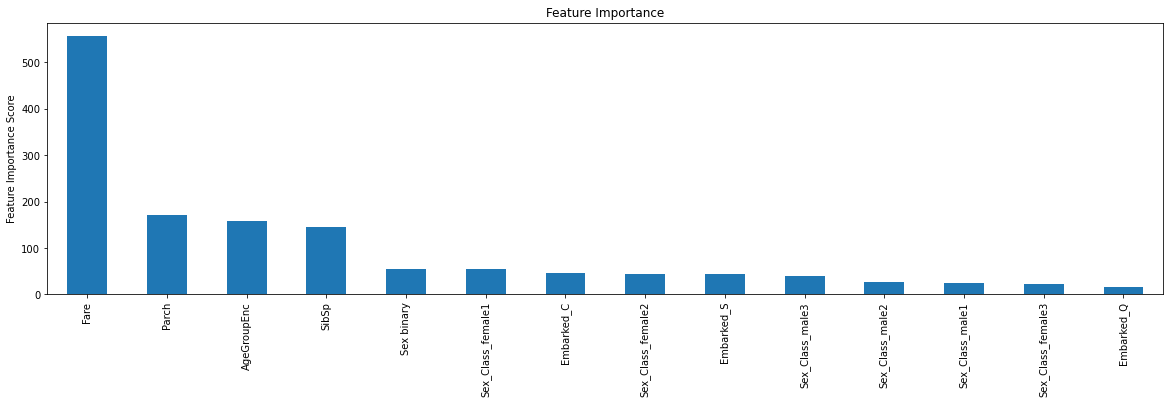

Fare                 558
Parch                172
AgeGroupEnc          158
SibSp                145
Sex binary            55
Sex_Class_female1     55
Embarked_C            46
Sex_Class_female2     45
Embarked_S            45
Sex_Class_male3       39
Sex_Class_male2       27
Sex_Class_male1       25
Sex_Class_female3     22
Embarked_Q            17
dtype: int32


In [35]:
#Feature importance 
predictors = [x for x in x.columns]
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:20]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')
plt.show()
print(feat_imp)

In [148]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42).fit(x_train, y_train)

y_test_pred = xgb_model.predict(x_test)
y_train_pred = xgb_model.predict(x_train)

print('Accuracy of XGBoosting on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of XGBoosting  Classification on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of XGBoosting  Classification on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of XGBoosting  Classification on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of XGBoosting  Classification on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))


[20:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoosting on training set: 0.928

Accuracy of XGBoosting  Classification on test set: 0.812

Precision of XGBoosting  Classification on test set: 0.750

Recall of XGBoosting  Classification on test set: 0.750

F1_score of XGBoosting  Classification on test set: 0.750

Confusion matrix
 [[118  21]
 [ 21  63]]


In [149]:
# Make Random Forest Classification
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)
forest = RandomForestClassifier(criterion="gini",random_state=0).fit(x_train,y_train)

y_test_pred = forest.predict(x_test)
y_train_pred = forest.predict(x_train)

print('Accuracy of Random Forest Classification on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Random Forest Classification on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of Random Forest Classification on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of Random Forest Classification on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of Random Forest Classification on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

Accuracy of Random Forest Classification on training set: 0.936

Accuracy of Random Forest Classification on test set: 0.812

Precision of Random Forest Classification on test set: 0.756

Recall of Random Forest Classification on test set: 0.738

F1_score of Random Forest Classification on test set: 0.747

Confusion matrix
 [[119  20]
 [ 22  62]]


In [150]:
# Make Simple CNb
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)
CNb = CategoricalNB().fit(x_train,y_train)

y_test_pred = CNb.predict(x_test)
y_train_pred = CNb.predict(x_train)

print('Accuracy of CNb on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of CNb on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of CNb on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of CNb on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of CNb on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

Accuracy of CNb on training set: 0.805

Accuracy of CNb on test set: 0.794

Precision of CNb on test set: 0.716

Recall of CNb on test set: 0.750

F1_score of CNb on test set: 0.733

Confusion matrix
 [[114  25]
 [ 21  63]]


In [151]:
# Make Simple Nb
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)
Nb = GaussianNB().fit(x_train,y_train)

y_test_pred = Nb.predict(x_test)
y_train_pred = Nb.predict(x_train)

print('Accuracy of Nb on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Nb on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of Nb on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of Nb on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of Nb on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

Accuracy of Nb on training set: 0.799

Accuracy of Nb on test set: 0.780

Precision of Nb on test set: 0.716

Recall of Nb on test set: 0.690

F1_score of Nb on test set: 0.703

Confusion matrix
 [[116  23]
 [ 26  58]]


In [152]:
# Make Simple NN
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)
NN = MLPClassifier(max_iter=1000).fit(x_train,y_train)

y_test_pred = NN.predict(x_test)
y_train_pred = NN.predict(x_train)

print('Accuracy of NN on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of NN on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of NN on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of NN on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of NN on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

Accuracy of NN on training set: 0.831

Accuracy of NN on test set: 0.798

Precision of NN on test set: 0.767

Recall of NN on test set: 0.667

F1_score of NN on test set: 0.713

Confusion matrix
 [[122  17]
 [ 28  56]]


In [153]:
# Make Simple logistic Regression Classifier
x_train, x_test, y_train,  y_test = train_test_split(x, y, random_state=0)
logistic_reg = LogisticRegression(C=10).fit(x_train,y_train)

y_test_pred = logistic_reg.predict(x_test)
y_train_pred = logistic_reg.predict(x_train)

print('Accuracy of Logistic regression classifier on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

Accuracy of Logistic regression classifier on training set: 0.810

Accuracy of Logistic regression classifier on test set: 0.816

Precision of Logistic regression classifier on test set: 0.831

Recall of Logistic regression classifier on test set: 0.643

F1_score of Logistic regression classifier on test set: 0.725

Confusion matrix
 [[128  11]
 [ 30  54]]


In [167]:
cv_results = cross_validate(xgb_model, x, y, cv=5)
print("XGBOOST test_score mean:{:.3f}".format(cv_results["test_score"].mean()),cv_results["test_score"])
cv_results = cross_validate(forest, x, y, cv=5)
print("Forest test_score mean:{:.3f}".format(cv_results["test_score"].mean()),cv_results["test_score"])
cv_results = cross_validate(NN, x, y, cv=5)
print("NN test_score mean:{:.3f}".format(cv_results["test_score"].mean()),cv_results["test_score"])
cv_results = cross_validate(logistic_reg, x, y, cv=5)
print("Logisitic Regression test_score mean:{:.3f}".format(cv_results["test_score"].mean()),cv_results["test_score"])
cv_results = cross_validate(Nb, x, y, cv=5)
print("Naive Bayes test_score mean:{:.3f}".format(cv_results["test_score"].mean()),cv_results["test_score"])

[20:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [98]:
df_test = pd.read_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\test.csv")

In [99]:
df_test["Sex binary"] = df_test["Sex"].replace(["male","female"],[1,0])
age_median = df_test["Age"].median()
df_test["Age"] = df_test["Age"].fillna(age_median)
df_test["AgeGroup"] = pd.cut(df_test["Age"], bins = [0,20,40,60,80])
df_test["AgeGroupEnc"] = LabelEncoder().fit_transform(df_test["AgeGroup"])
df_test["Pclass_str"] = df_test["Pclass"].apply(lambda x: str(x))
df_test["Sex_Class"] = df_test.loc[:,['Sex',"Pclass_str"]].apply(lambda x: "".join(x),axis=1)
fare_mean = df_test["Fare"].mean()
df_test["Fare"] = df_test["Fare"].fillna(fare_mean)

In [100]:
x_submission = pd.concat([pd.get_dummies(df_test.loc[:,["Embarked","Sex_Class"]]),df_test.loc[:,["Fare","AgeGroupEnc","Parch","SibSp","Sex binary"]]],axis=1)

In [114]:
# LGB submission
y_pred_submission_pob = grid.predict(x_submission)
# setting prob to number
y_pred_submisson = []
threshold = 0.505051
for i in range(x_submission.shape[0]):    
    if y_pred_submission_pob[i] >= threshold:       
       y_pred_submisson.append(1)
    else:  
       y_pred_submisson.append(0)
df_Survived = pd.DataFrame(y_pred_submisson,columns=["Survived"])
df_submission = pd.concat([df_test["PassengerId"],df_Survived],axis=1)
df_submission.to_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\submission_LGB.csv",index=False)
# Kaggle public score = 0.78708

In [161]:
# XGB submission
y_pred_XGB = xgb_model.predict(x_submission)
df_Survived = pd.DataFrame(y_pred_XGB,columns=["Survived"])
df_submission = pd.concat([df_test["PassengerId"],df_Survived],axis=1)
df_submission.to_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\submission_XGB.csv",index=False)
# Kaggle public score = 0.76076

In [162]:
# Random forest submission
y_pred_forest = forest.predict(x_submission)
df_Survived = pd.DataFrame(y_pred_forest,columns=["Survived"])
df_submission = pd.concat([df_test["PassengerId"],df_Survived],axis=1)
df_submission.to_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\submission_forest.csv",index=False)
# Kaggle public score = 0.77033

In [165]:
# Simple NN submission
y_pred_NN = NN.predict(x_submission)
df_Survived = pd.DataFrame(y_pred_NN,columns=["Survived"])
df_submission = pd.concat([df_test["PassengerId"],df_Survived],axis=1)
df_submission.to_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\submission_NN.csv",index=False)
# Kaggle public score = 0.77751

In [166]:
# Logistic Regression submission
y_pred_logistic = logistic_reg.predict(x_submission)
df_Survived = pd.DataFrame(y_pred_logistic,columns=["Survived"])
df_submission = pd.concat([df_test["PassengerId"],df_Survived],axis=1)
df_submission.to_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\submission_logistic_regression.csv",index=False)
# Kaggle public score = 0.77511

In [168]:
# Naive Bayes submission
y_pred_Nb = Nb.predict(x_submission)
df_Survived = pd.DataFrame(y_pred_Nb,columns=["Survived"])
df_submission = pd.concat([df_test["PassengerId"],df_Survived],axis=1)
df_submission.to_csv(r"C:\Users\monol\OneDrive - Singapore Management University\Python and R\GitHub\Portfolio\Titanic competition\submission_Nb.csv",index=False)
# Kaggle public score = 0.76315

| Model | Kaggle Public Accuracy Score |
| :- | :--------------------- |
| LGB  | 0.78708 | 
| NN  | 0.77751 | 
| Logistic Regression  | 0.77511 | 
| Random forest  |0.77033 | 
| Naive Bayes  | 0.76315 | 
| XGB  | 0.76076 | 